In [1]:
!pip install pandas numpy xgboost shap tensorflow requests scikit-learn networkx


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"karrasukesh","key":"8a3ce5cd82cd5bbd5f12b25688821a72"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d usdot/flight-delays
!unzip flight-delays.zip -d ./dataset


Dataset URL: https://www.kaggle.com/datasets/usdot/flight-delays
License(s): CC0-1.0
Archive:  flight-delays.zip
  inflating: ./dataset/airlines.csv  
  inflating: ./dataset/airports.csv  
  inflating: ./dataset/flights.csv   


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
model = models.Sequential()

# First Conv Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Conv Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Conv Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten + Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train_cat, epochs=10,
                    validation_data=(X_test, y_test_cat), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.3063 - loss: 1.8542 - val_accuracy: 0.4869 - val_loss: 1.3837
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.5406 - loss: 1.2941 - val_accuracy: 0.5841 - val_loss: 1.1703
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6005 - loss: 1.1223 - val_accuracy: 0.6283 - val_loss: 1.0584
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.6489 - loss: 1.0007 - val_accuracy: 0.6447 - val_loss: 1.0023
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 80ms/step - accuracy: 0.6699 - loss: 0.9335 - val_accuracy: 0.6430 - val_loss: 1.0119
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.6922 - loss: 0.8729 - val_accuracy: 0.6730 - val_loss: 0.9303
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.7123 - loss: 0.8242 - val_accuracy: 0.6829 - val_loss: 0.9163
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.7314 - loss: 0.7735 - 

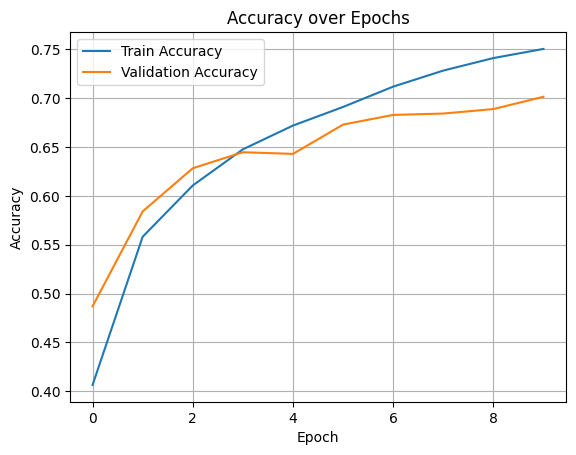

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title("Accuracy over Epochs")
plt.show()


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 - 3s - 11ms/step - accuracy: 0.7015 - loss: 0.8632
Test accuracy: 70.15%


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


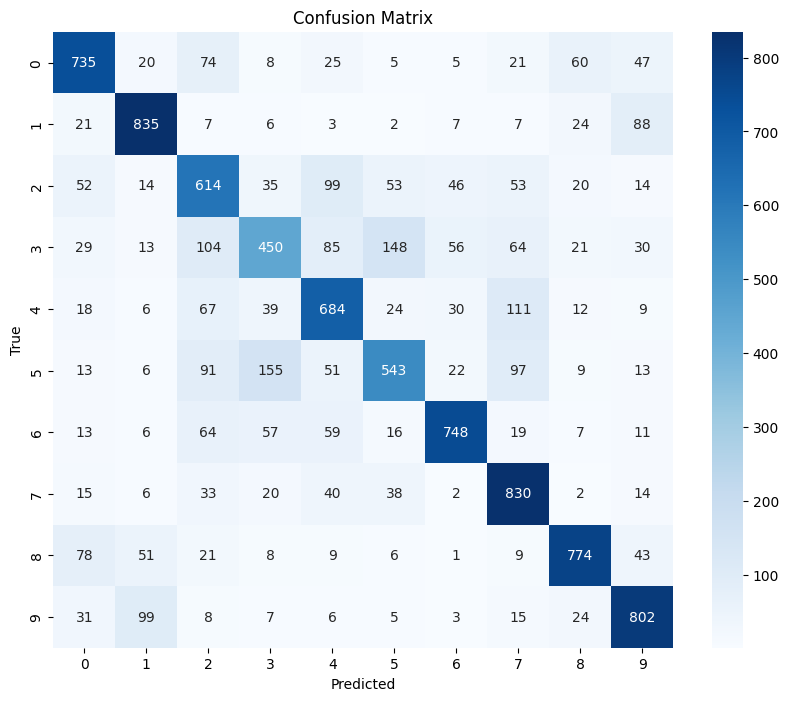

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.79      0.83      0.81      1000
           2       0.57      0.61      0.59      1000
           3       0.57      0.45      0.50      1000
           4       0.64      0.68      0.66      1000
           5       0.65      0.54      0.59      1000
           6       0.81      0.75      0.78      1000
           7       0.68      0.83      0.75      1000
           8       0.81      0.77      0.79      1000
           9       0.75      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.reshape(-1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_classes))


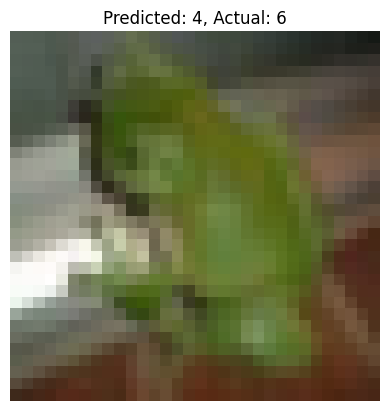

In [10]:
index = 7
plt.imshow(X_test[index])
plt.title(f"Predicted: {y_pred_classes[index]}, Actual: {y_test[index][0]}")
plt.axis('off')
plt.show()


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)